## Interferencia por haces múltiples. Filtros interferenciales.

El siguiente notebook explica la irradiancia obtenida en transmisión y reflexión cuando un haz incide en una lámina delgada planoparalela considerando las múltiples reflexiones internas que se producen en dicha lámina. Se asume que el estudiante conoce el caso de interferencia por las dos primeras ondas reflejadas o transmitidas

#### Planteamiento del problema

Consideremos una lámina planoparalela de espesor *h* e índice de refracción *n*, rodeada de aire. El tratamiento con las 2 primeras ondas reflejadas o transmitidas, es una aproximación válida cuando los coeficientes de reflexión son bajos. En caso contrario, se hace necesario considerar todas las reflexiones internas producidas en la lámina, y consecuentemente, todas las ondas transmitidas o reflejadas. 

Vamos a ver qué ocurre con la irradiancia transmitida y reflejada en este caso. Lo que nos interesa es ver si 

* cambia la posición de los máximos/mínimos obtenidos en el caso de la interferencia con 2 ondas.
* cambia el contraste.

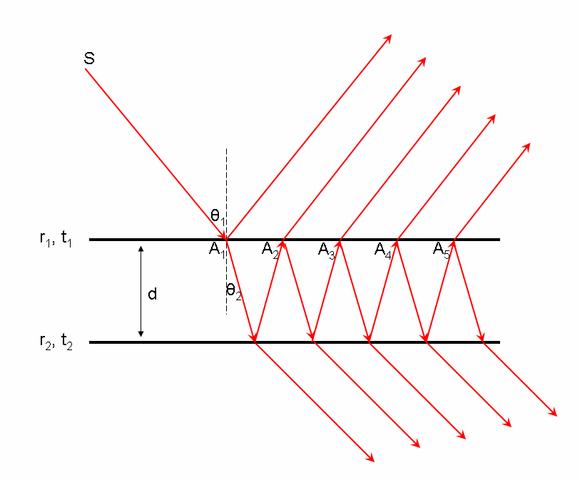

In [1]:
from IPython.core.display import Image
Image("./580px-Multiple_beam_interference.png")

#### Cálculo del campo total en reflexión y en transmisión

En la figura anterior se muestran las sucesivas reflexiones internas en la lámina que generan las ondas que queremos hacer interferir. El procedimiento sería análogo a lo ya estudiado con 2 ondas. Colocando una lente y observando en su plano focal obtendremos anillos de interferencia. 

Llamaremos al coeficiente de reflexión en la transición aire-lámina *r*, y al de transmisión *t*, mientras que llamaremos *r'* y *t'* a los coeficientes para la transición lámina-aire.

Con esto en mente, podemos ver que las ondas que interfieren en **transmisión** son, 

$$E_{t1} = E_0 t t' e^{i \omega t}$$
$$E_{t2} = E_0 t t' r'^2 e^{i[ \omega t - \delta_G ]}$$
$$E_{t3} = E_0 t t' r'^4 e^{i[ \omega t - 2 \delta_G ]}$$
.

.

.

$$E_{tN} = E_0 t t' r'^{2(N-1)} e^{i[ \omega t - (N-1) \delta_G ]}$$

donde $\delta_G = \frac{4 \pi}{\lambda} n h cos(\theta_t)$ es el desfase entre ondas sucesivas debido a la diferencia de caminos (el desfase debido a las reflexiones se tiene en cuenta en los coeficientes de reflexión).


Igualmente, las ondas que interfieren en **reflexión** son, 

$$E_{r1} = E_0 r e^{i \omega t}$$
$$E_{r2} = E_0 t t' r' e^{i[ \omega t - \delta_G ]}$$
$$E_{r3} = E_0 t t' r'^3 e^{i[ \omega t - 2 \delta_G ]}$$
.

.

.

$$E_{rN} = E_0 t t' r'^{(2N-3)} e^{i[ \omega t - (N-1) \delta_G ]}$$

--------------------------------


Si la lámina es suficientemente larga o el ángulo de incidencia no muy grande, tendremos muchas ondas interfiriendo ($N \rightarrow \infty$). Sumando todas, tendremos el campo total en transmisión o reflexión. Esta suma puede realizarse y se obtiene, 

$$E_t = E_0 e^{i \omega t} \left[\frac{t t'}{1 - r^2 e^{-i\delta_G}} \right]$$
$$E_r = E_0 e^{i \omega t} \left[\frac{r(1 - e^{-i\delta_G})}{1 - r^2 e^{-i\delta_G}} \right]$$

donde en la última expresión se ha utilizado que $r = r'$ y que $t t' = 1 - r^2$ (por conservarción de la energía y dado que no consideramos absorción en el medio)

#### Cálculo de la irradiancia

De las expresiones anteriores llegamos a que la irradiancia en transmisión/reflexión es igual a,

$$I_t = I_0 \left[\frac{(t t')^2}{1 + r^4 - 2 r^2 cos(\delta_G)} \right]$$

$$I_r = I_0 \left[\frac{2 r^2 (1 - cos(\delta_G))}{1 + r^4 - 2 r^2 cos(\delta_G)} \right]$$

Las ecuaciones anteriores se pueden transformar a expresiones más cómodas considerando que $cos \delta_G = 1 - 2 sen^2 (\delta_G /2) \;\;\;\;\;$ y definiendo un nuevo coeficiente denominado **coeficiente de fineza** que tiene en cuenta cuánto refleja cada cara de la lámina,

$$F = \left( \frac{2 r}{1 -r^2} \right)$$

Así,

$$I_t = \frac{I_0}{1 + F sen^2(\delta_G/2)}$$

$$I_r = I_0 \left[\frac{F sen^2(\delta_G/2)}{1 +F sen^2(\delta_G/2)} \right]$$


A la función $A(\delta) = \frac{1}{1 + F sen^2(\delta/2)} \;\;\;\;\;$ se le denomina **función de Airy**



#### Análisis de las expresiones

1. ¿Cuánto vale I_0 - I_t?
    $$I_0 - I_t = I_0 - \frac{I_0}{1 + F sen^2(\delta_G/2)} = I_0 \left[\frac{F sen^2(\delta_G/2)}{1 +F sen^2(\delta_G/2)} \right] = I_r$$
    Por tanto, $I_0 = I_i + I_t \;\;\;\;$. Es decir, cuando la irradiancia en reflexión es máxima, la irradiancia en transmisión es mínima y viceversa.



2. ¿Cuándo obtenemos máximos en $I_t$?

     Los máximos de la irradiancia transmitida se obtendrán cuando en su expresión, el denominador sea mínimo. Esto ocurre cuando $sen^2(\delta_G / 2) = 0 \;\;\;\;$, es decir, cuando $\delta_G = 2 m \pi \;\;\;$. Obtenemos pues, **la misma condición de máximos en transmisión (y mínimos en reflexión por tanto) que en la interferencia de las 2 primeras ondas transmitidas/reflejadas**.


3. ¿Cuál es la forma de la función $I_t / I_0$?. 

    Depende del valor de $F$. Vamos a dibujarla para varios valores del coeficiente de fineza



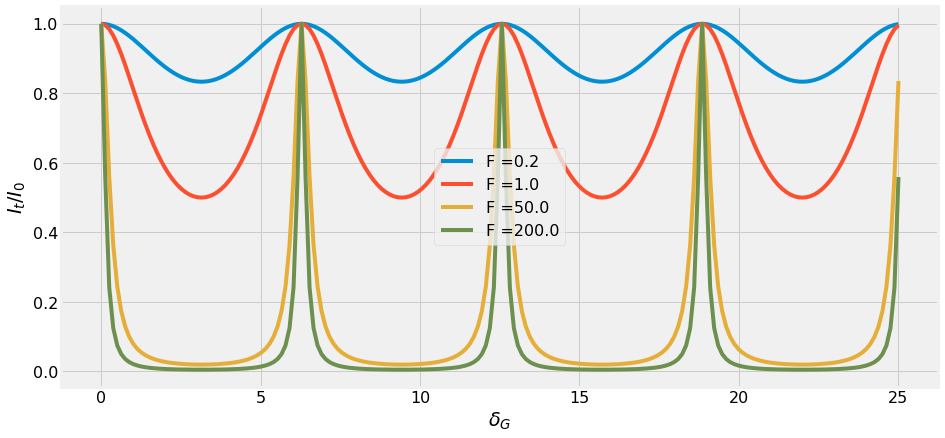

In [2]:
# Programa para dibujar la irradiancia transmitida. Filtros interferenciales.
import numpy as np
from numpy import *
from matplotlib.pyplot import *
style.use('fivethirtyeight')
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
fig = figure(figsize=(14,7))
deltaG = np.arange(0,8*pi,8*pi/200) # Creamos un vector de desfases geométricos
F = np.array([0.2,1,50,200])
for i in np.arange(len(F)):
    It = 1.0/(1.0 + F[i]*sin(deltaG/2)**2)
    texto = 'F =' + str(F[i]) 
    plot(deltaG,It,label=texto)
    xlabel(r'$\delta_G$')
    ylabel(r'$I_t/I_0$')
    legend()
   

Como vemos en la figura superior, cuanto mayor sea el valor del coeficiente de fineza, más estrechos son los máximos de $I_t$ lo que se traduce en anillos más estrechos en el patrón de interferencia que obtenemos a la salida de la lámina. Además el contraste es a su vez mayor. Hay que recordar que el coeficiente de fineza es mayor cuanto mayor sea la reflectividad en cada cara de la lámina.

Se puede demostrar que la anchura de cada pico es igual a $\Delta \delta_G = 4/\sqrt{F}$

La figura superior muestra la irradiancia en función del desfase geométrico $\delta_G$. Pero éste a su vez depende de varios factores $\delta_G = 2 k n e cos(\theta_t)$.

Si consideramos incidencia normal, $cos(\theta_t) = 1 \;\;\;$ y vemos que $\delta_G$ depende de la longitud de onda de la radiación incidente a través del vector de ondas $k = 2 \pi / \lambda $.

Podemos pues dibujar la irradiancia total en función de $\lambda$ (para incidencia normal)

Populating the interactive namespace from numpy and matplotlib


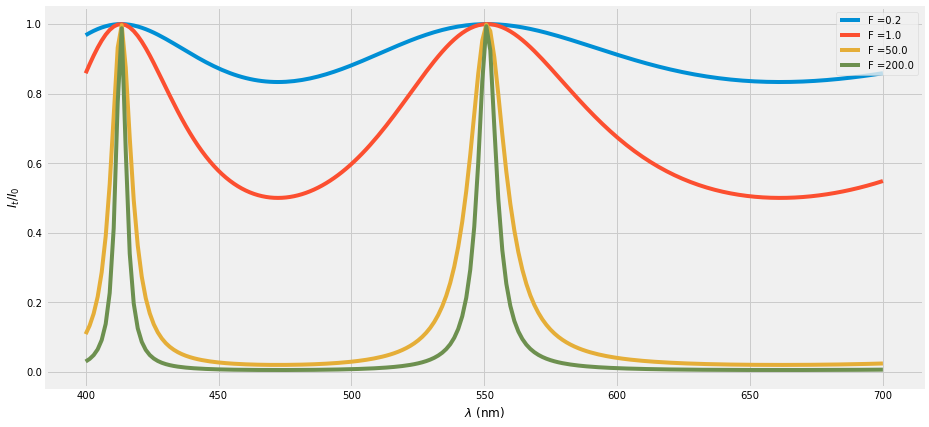

In [3]:
# Programa para dibujar la irradiancia transmitida en función de la longitud de onda. Filtros interferenciales.
%pylab inline
fig = figure(figsize=(14,7))
Lambda = np.linspace(400,700,200) # Creamos un vector de longitudes de onda en el visible (en nm)
F = np.array([0.2,1,50,200]) #mismo vector de coeficientes de fineza que en el caso anterior
n = 1.38 # índice de refracción de la lámina (escogemos la del MgF2)
e = 599 # escogemos el espesor de la lámina (en nm)
deltaG = (4.0*pi/Lambda)*n*e
for i in np.arange(len(F)):
    It = 1.0/(1.0 + F[i]*sin(deltaG/2)**2)
    texto = 'F =' + str(F[i]) 
    plot(Lambda,It,label=texto)
    xlabel(r'$\lambda$ (nm)')
    ylabel(r'$I_t/I_0$')
    legend()

Lo que vemos en la anterior figura es que si $F$ es suficientemente grande, podemos utilizar la lámina como un filtro espectral, ya que la transmitancia cae a valores muy cercanos a cero fuera de los picos que dan los máximos. Para aumentar $F$, se suelen usar recubrimientos metálicos (entonces los desfases debido a las reflexiones no son ya 0 ó $\pi$).

Si queremos obtener máxima transmitancia para $\lambda_0$, el espesor habrá de ser tal que se cumpla,

$$\frac{4 \pi}{\lambda_0} n e = 2 m \pi \implies e = \frac{m \lambda_0}{2 n}$$

Otro punto a destactar es que si se cumple la condición de máximo de transmitancia $\delta_G = 2 m \pi \;$  para una longitud de onda $\lambda_0 \;\;\;$ entonces también lo tendremos para las longitudes de onda $\lambda = \frac{\lambda_0}{m},, m = 2,3,... \;\;\;\;$ Normalmente, estas otras longitudes de onda se encuentran bastante alejadas y pueden ser filtradas añadiendo algún medio que las absorba (por ej. colorantes).

Por último vamos a ver una figura de cómo se verían los anillos en el plano focal de una lente situada después de nuestra lámina planoparalela. Para observar cómo cambia la anchura de los anillos con el valor de $F$, cambiar su valor (en la parte superior del código) y volver a ejecutar la celda.

Populating the interactive namespace from numpy and matplotlib


/home/edu/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/home/edu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


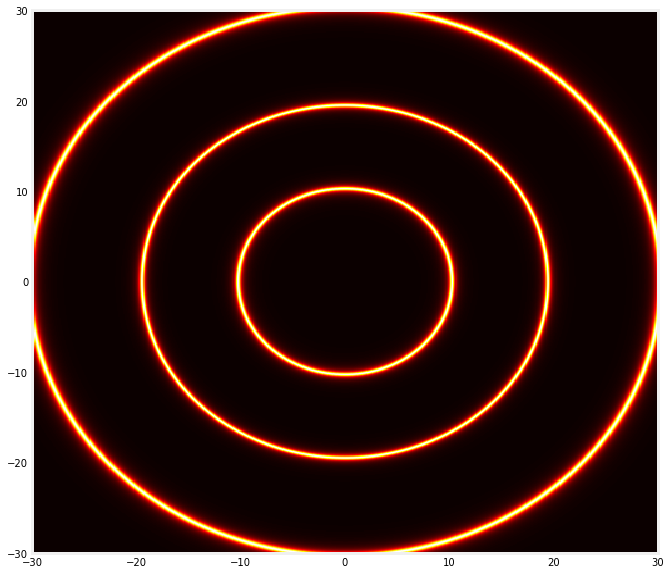

In [4]:
# MODIFICAR ESTE VALOR PARA VER COMO CAMBIA LA FIGURA
%pylab inline
F = 200 # coeficiente de fineza
####################
fig = figure(figsize=(10,10))
Lambda =590 #(nm)
n = 1.38 # índice de refracción de la lámina (escogemos la del MgF2)
e = 3230 # escogemos el espesor de la lámina (en nm)
focal = 30 #(mm)
x = np.linspace(-30,30,500)
[X,Y] = meshgrid(x,x)
rho =  np.sqrt(X**2 + Y**2) #(mm)https://nteract.gitbooks.io/hydrogen/content/
rhof = rho/focal
theta_i = np.arctan2(focal,rho)
theta_t = np.arcsin((1.0/n)*sin(theta_i))

deltaG = (4.0*pi/Lambda)*n*e*cos(theta_t)

I_t = 1.0/(1.0 + F*sin(deltaG/2)**2)
#plot(I_t[:,100])
pcolormesh(X,Y,I_t,cmap=cm.hot);


#### Interferómetro de Fabry-Perot

El interferómetro de Fabry-Perot está formado por dos espejos de alta reflectancia, paralelos entre sí y separados una cierta distancia $d$. Después de los espejos se sitúa una lente convergente y se observa el patrón interferencial en una pantalla colocada en su plano focal. El tratamiento de la interferencia de haces múltiples que tiene lugar en este interferómetro se analiza de forma igual a lo explicado anteriormente, apareciendo de nuevo la función de Airy para la transmitancia. 

Si se ilumina con una fuente extensa, todos los rayos que salgan paralelos entre sí convergen en un mismo punto, formando los anillos ya mencionados. Además, al usar dos espejos de alta reflectancia, el coeficiente de fineza puede alcanzar valores muy grandes, con lo que el contraste será muy alto, y los anillos muy estrechos.

Si sobre el interferómetro inciden dos radiaciones con longitudes de onda muy próximas $\lambda$ y $\lambda + \Delta \lambda$, los máximos de interferencia estarán ligeramente separados el desfase asociado a cada una de las longitudes de onda, será,

$$ \delta_1 = \frac{4\pi}{\lambda} n d$$
$$ \delta_2 = \frac{4\pi}{\lambda + \Delta \lambda} n d$$

Si nos situamos en un máximo de interferencia para $\lambda$, tendremos que $\delta_1 = 2 m \pi\;\;$, y $\delta_2 = 2 m \pi + \epsilon \;\;$

Los máximos de interferencia por tanto estarán muy próximos si las longitudes de onda son muy similares. ¿Cuándo podremos distinguirlas?. Como criterio se puede asumir que el mínimo intervalo espectral (diferencia entre las longitudes de onda) resoluble es aquel que hace la separación entre los máximos sea igual a su anchura media. 

Recordando que la anchura media en desfase de un máximo de interferencia es igual a $\Delta \delta = 4/\sqrt{F}$, entonces $\epsilon = 2/\sqrt{F}$

Si juntamos todas las expresiones y operamos, tendremos que, 

$$\Delta \lambda_{min} = \frac{\lambda^2}{2 \pi n d \sqrt{F}}$$

Por tanto, cuanto mayor sea $F$, menor será el intervalo espectral resoluble mínimo.

En la siguiente figura podemos modificar el valor del coeficiente de fineza asi como la separacion entre dos longitudes de onda observando como el interferometro de Fabry-Perot separa los anillos correspondientes a ambas longitudes de onda, pudiendo por tanto resolverlas o no en funcion del valor de dicho coeficiente.

/home/edu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


(5.0, 15.0)

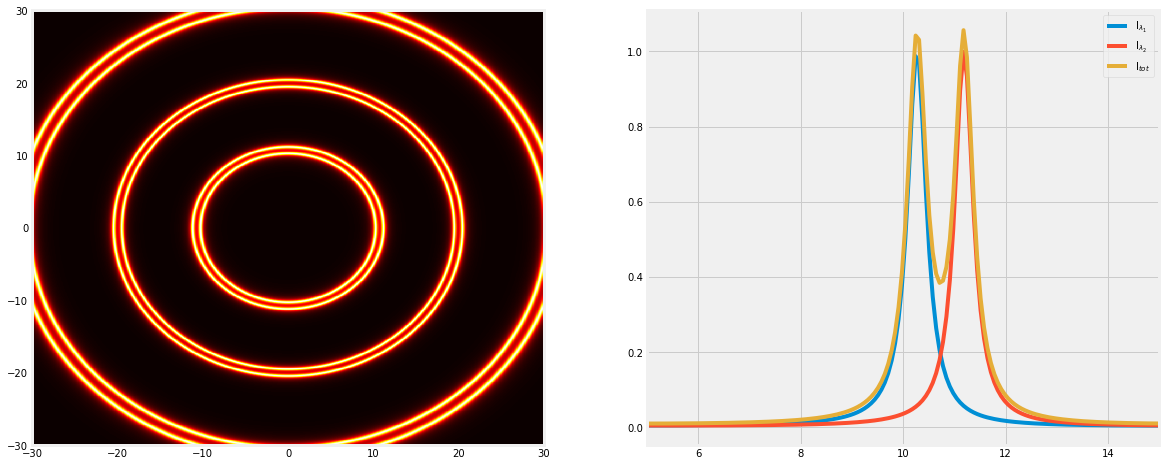

In [5]:
# MODIFICAR ESTE VALOR PARA VER COMO CAMBIA LA FIGURA
F = 200 # coeficiente de fineza
Lambda1 =590 #(nm)
DeltaLambda = 5 # (nm)
Lambda2 = Lambda1+DeltaLambda #(nm)
####################
n = 1.38 # índice de refracción de la lámina (escogemos la del MgF2)
e = 3230 # escogemos el espesor de la lámina (en nm)
focal = 30 #(mm)
x = np.linspace(-30,30,900)
[X,Y] = meshgrid(x,x)
rho =  np.sqrt(X**2 + Y**2) #(mm)
rhof = rho/focal
theta_i = np.arctan2(focal,rho)
theta_t = np.arcsin((1.0/n)*sin(theta_i))

deltaG1 = (4.0*pi/Lambda1)*n*e*cos(theta_t)
deltaG2 = (4.0*pi/Lambda2)*n*e*cos(theta_t)
I_t1 = 1.0/(1.0 + F*sin(deltaG1/2)**2)
I_t2 = 1.0/(1.0 + F*sin(deltaG2/2)**2)
I_t = I_t1+I_t2
#plot(I_t[:,100])
fig = figure(figsize=(18,8))
subplot(1,2,1)
pcolormesh(X,Y,I_t,cmap=cm.hot);
subplot(1,2,2)
plot(x,I_t1[int(np.floor(x.shape[0]/2)),:])
plot(x,I_t2[int(np.floor(x.shape[0]/2)),:])
plot(x,I_t[int(np.floor(x.shape[0]/2)),:])
legend((r'I$_{\lambda_1}$',r'I$_{\lambda_2}$',r'I$_{tot}$'))
xlim(5,15)

#### Para saber más

[Interferómetro de Fabry-Perot en RP-Photonics](https://www.rp-photonics.com/fabry_perot_interferometers.html)
